In [1]:
using StylizedFacts
using Plots
using InteractingLOBs
using RelevanceStacktrace
using StatsBase

[ Info: Precompiling InteractingLOBs [1931dee9-8ecc-45e4-adec-8e58a11a0d04]


In [2]:
#names(InteractingLOBs)

In [3]:
# Configuration Arguments
num_paths = 1
M = 400
T = 3000
p₀ = 238.75
L = 200

# Free-Parameters for gaussian version
D = 1.0
σ = 1.5

ν = 0.5
α_slob = 40.0
α_lob = 0.0
α = α_lob

0.0

In [4]:
Δx = L / M 
Δt = (Δx^2) / (2.0 * D)
println(Δx)
println(Δt)

0.5
0.125


In [5]:
λ = 1.0
μ = 0.1 

mySourceTerm = SourceTerm(λ, μ)

SourceTerm(1.0, 0.1)

In [6]:
# coupling:
#a = gap between stocks before kicks in
#b = weighting of interaction term
#c = skew factor

#strong coupling:
#a = 0.3
#b = 2
#c = 2


#reasonable coupling: 
a = 13.0 
b = 1
c = 1.2 

myInteractionTerm = InteractionTerm(μ, a, b, c)

InteractionTerm(0.1, 13.0, 1.0, 1.2)

In [19]:
StartTime = 150
EndTime = 300
Position = 0
Amount = 5.0
# If position == -x where x>=0, then put it x above the mid price each time

5.0

In [20]:
myRLPusher1 = RLPushTerm(StartTime,EndTime,Position,Amount,true)

lob_model¹ = SLOB(num_paths, T, p₀, M, L, D, σ, ν, α, 
    mySourceTerm, myInteractionTerm, myRLPusher1)

SLOB(1, 3000, 238.75, 400, 200.0, 1.0, 1.5, 0.5, 0.0, SourceTerm(1.0, 0.1), InteractionTerm(0.1, 13.0, 1.0, 1.2), RLPushTerm(150, 300, 0, 5.0, true), [138.75, 139.25, 139.75, 140.25, 140.75, 141.25, 141.75, 142.25, 142.75, 143.25  …  334.25, 334.75, 335.25, 335.75, 336.25, 336.75, 337.25, 337.75, 338.25, 338.75], 0.5, 0.125)

In [21]:
myRLPusher2 = RLPushTerm(StartTime,EndTime,Position,Amount,false)

lob_model² = SLOB(num_paths, T, p₀, M, L, D, σ, ν, α, 
    mySourceTerm, myInteractionTerm, myRLPusher2)

SLOB(1, 3000, 238.75, 400, 200.0, 1.0, 1.5, 0.5, 0.0, SourceTerm(1.0, 0.1), InteractionTerm(0.1, 13.0, 1.0, 1.2), RLPushTerm(150, 300, 0, 5.0, false), [138.75, 139.25, 139.75, 140.25, 140.75, 141.25, 141.75, 142.25, 142.75, 143.25  …  334.25, 334.75, 335.25, 335.75, 336.25, 336.75, 337.25, 337.75, 338.25, 338.75], 0.5, 0.125)

In [26]:
lob_densities¹, sources¹, couplings¹, rl_pushes¹, raw_price_paths¹, sample_price_paths¹, P⁺s¹, P⁻s¹, Ps¹, 
lob_densities², sources², couplings², rl_pushes², raw_price_paths², sample_price_paths², P⁺s², P⁻s², Ps² =
InteractOrderBooks(lob_model¹,lob_model², -1) ;

1 RanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRanRan

Plots.AnimatedGif("/tmp/LOB.gif")
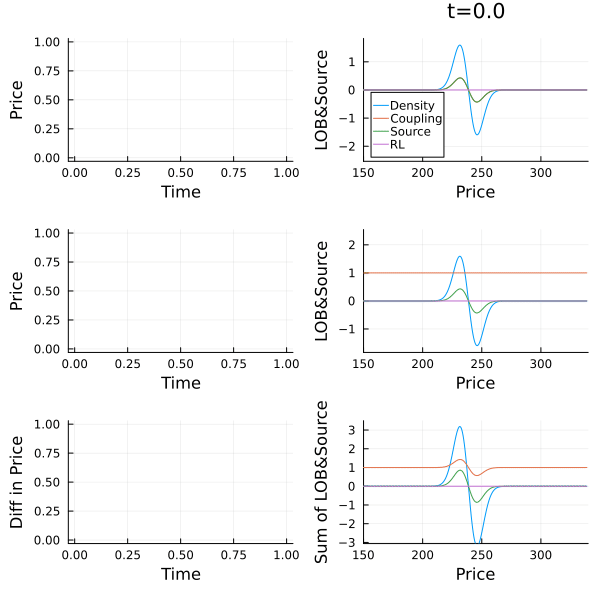

In [27]:
total_length = length(sample_price_paths¹[:,1]) #consists of T/Δt times
total_steps = 200
step = floor(Int,total_length/total_steps)

# the below just ensure we see the full graph (100-myp)% of the time
myp = 10
max_y¹ = percentile( [maximum(lob_densities¹[:,i,1]) for i in 1:length(lob_densities¹[:,1,1])] , 100-myp)
min_y¹ = percentile( [minimum(lob_densities¹[:,i,1]) for i in 1:length(lob_densities¹[:,1,1])] , myp)
max_y² = percentile( [maximum(lob_densities²[:,i,1]) for i in 1:length(lob_densities²[:,1,1])] , 100-myp)
min_y² = percentile( [minimum(lob_densities²[:,i,1]) for i in 1:length(lob_densities²[:,1,1])] , myp)

anim = @animate for i = 1:step:floor(Int,total_length)
    l = @layout [a d; b e; c f]
    
    time_step = round(i * lob_model¹.Δt, digits=0) 
    time_step_ind = floor(Int, time_step)
    
    plt1 = plot(1:time_step_ind, sample_price_paths¹[1:time_step_ind,1],color=1) ;
        for path in 2:lob_model¹.num_paths
            plot!(1:time_step_ind, sample_price_paths¹[1:time_step_ind,path],color=1) ;
        end
        plot!(legend=false, ylab="Price", xlab="Time") ;
    
    plt2 = plot(lob_model¹.x, lob_densities¹[:,i,1], color=1,label="Density"); #note: i = time_step_ind/Δt i.e. stretched out version
        plot!(lob_model¹.x, couplings¹[:,i,1], color=2, label="Coupling") ;
        plot!(lob_model¹.x, sources¹[:,i,1], color=3, label="Source") ;
        plot!(lob_model¹.x, rl_pushes¹[:,i,1], color=4, label="RL") ;
        #plot!(lob_model¹.x, x -> 0,color="black", primary=false) ; #draw horizontal line
        plot!( legend=:bottomleft, title="t=$time_step", xlab="Price", ylab="LOB&Source",ylim=[min_y¹,max_y¹],xlim=[150,340]) ;
    
    plt3 = plot(1:time_step_ind, sample_price_paths²[1:time_step_ind,1],color=1) ;
        for path in 2:lob_model².num_paths
            plot!(1:time_step_ind, sample_price_paths²[1:time_step_ind,path],color=1) ;
        end
        plot!(legend=false, ylab="Price", xlab="Time") ;
    
    plt4 = plot(lob_model².x, lob_densities²[:,i,1],color=1) ; #note: i = time_step_ind/Δt i.e. stretched out version
        plot!(lob_model².x, couplings²[:,i,1],color=2) ;
        plot!(lob_model².x, sources²[:,i,1],color=3) ;
        plot!(lob_model².x, rl_pushes²[:,i,1],color=4) ;
        #plot!(lob_model².x, x -> 0,color="black") ; #draw horizontal line
        plot!(legend=false, title="", xlab="Price", ylab="LOB&Source",ylim=[min_y²,max_y²],xlim=[150,340]) ;
    
    
    plt5 = plot(1:time_step_ind, sample_price_paths¹[1:time_step_ind,1] - sample_price_paths²[1:time_step_ind,1],color=1) ;
        for path in 2:lob_model².num_paths
            plot!(1:time_step_ind, sample_price_paths¹[1:time_step_ind,path] - sample_price_paths²[1:time_step_ind,path],color=1) ;
        end
        plot!(legend=false, ylab="Diff in Price", xlab="Time") ;
    
    plt6 = plot(lob_model².x, lob_densities¹[:,i,1]+lob_densities²[:,i,1],color=1) ; #note: i = time_step_ind/Δt i.e. stretched out version
        plot!(lob_model².x, couplings¹[:,i,1]+couplings²[:,i,1],color=2) ;
        plot!(lob_model².x, sources¹[:,i,1]+sources²[:,i,1],color=3) ;
        plot!(lob_model².x, rl_pushes¹[:,i,1]+rl_pushes²[:,i,1],color=4) ;
        #plot!(lob_model².x, x -> 0,color="black") ; #draw horizontal line
        plot!(legend=false, title="", xlab="Price", ylab="Sum of LOB&Source",ylim=[(min_y¹+min_y²)*0.7,(max_y¹+max_y²)*(100-myp-10)/100],xlim=[150,340]) ;
    
    
    plot(plt1, plt2, plt3, plt4, plt5, plt6 ,layout=l,size=(600,600))
end

gif(anim, "/tmp/LOB.gif", fps=10)
#gif(anim, "~/Desktop/Masters/GoodPics/x.gif", fps=8)
#gif(anim, "~/Desktop/Masters/GoodPics/LongCoupledWeak2.gif", fps=16)

In [24]:
sample_price_paths¹[end,1] #NB problem

1.0

In [ ]:
test = sample_price_paths¹[3-1:end-1,1] - sample_price_paths¹[3-2:end-2,1]

In [ ]:
histogram(test)